In [1376]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy.fft import fft2
from numpy.fft import ifft2
from numpy.fft import fftn
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

# Ex08 Aplicações da DFT



## Parte 1 - Filtragem no Domínio da Frequência

Dos itens abaixo *a*, *b* e *c* você deve fazer obrigatoriamente o item *a* e no mínimo mais um item: *b* ou *c*. Nada impede você de fazer os 3 itens: *a*, *b* e *c*.

### a. Projetando filtros no domínio da frequência

Para projetar os filtros no domínio da frequência, utilize imagens sintéticas, como círculo ou quadrado ou retângulo (filtros ideais), tomando-se o cuidado para verificar se estes filtros são complexos-conjugados. Se preciso, crie uma função que retorne *True*, caso a imagem seja complexa conjugada e *False*, caso contrário. Lembre-se também que o projeto do filtro é normalmente feito no espectro ótico de Fourier, mas sua aplicação é feita com coordenadas 0 a N-1.

Teste os filtros projetados filtrando alguma imagem.

# Resolução
### item a)

### Funções simétricas conjugadas





Quando uma função é simétrica conjugada, vale dizer que:
<center>
$ F$ <sup>\*</sup> $(u,v) = F(-u,-v) $
<br>

<center>
$ |F(u,v)| = |F(-u,-v)| $
<br>
<center>
$ \phi(u,v) = - \phi (-u,-v) $


Assim, é valido dizer que a transformada de fourier de uma função **real** *f(x,y)*  é simétrica conjugada. 

Para tanto, vamos criar uma função que faz essa verificação. Esta implementação foi baseada na função isscym da toolbox da disciplina.


In [1377]:
def is_sconjugate(mat):
    #determina se um array 2D é simétrico conjugado ou não.
    n,m = mat.shape
    #print(n,m)

    x0,y0= np.indices((n,m))
    #np.mod obtem o resto da divisao inteira
    x1 = np.mod(-1*x0,n)
    #print(x1)
    y1 = np.mod(-1*y0,m)
    #print(y1)
    
    aux = np.conjugate(mat[x1,y1])
    aux2 = (abs(mat-aux)< 10E-4).all()
    
    
    return aux2
    #testando:

#testando com uma função simétrica conjugada
T1= np.array([[ 0j,1j,-1j], 
              [ 2j,4j,-3j],
              [-2j,3j,-4j]])

#testando com uma função que não é simétrica conjugada
T2 = np.array([ [ 2j,1j,-1j], 
                [ 2j,4j,-3j],
                [-2j,3j,-4j]])

print(is_sconjugate(T1))
print(is_sconjugate(T2))

True
False


### Retomando a Geração de Imagens Sintéticas

Primeiramente, vamos definir algumas funções para a geração de quadrados e círculos, que serão utilizadas mais adiante:

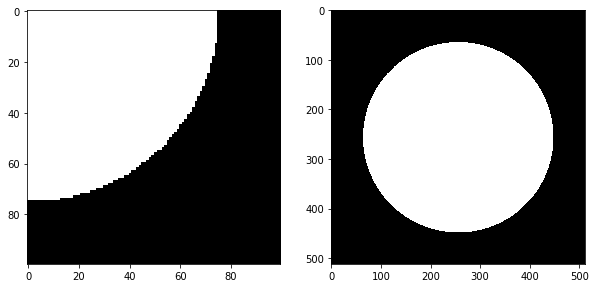

In [1378]:
def gen_circle(W,H,radius,x_center,y_center):
    #imprimir uma circunferencia em uma figura com dimensoes WxH
    #raio: radius
    #centrada em (x_center, y_center)
    
    
    L, C = np.indices((W,H))
    func = ((L-y_center)**2 + (C-x_center)**2 < radius**2)

    return func
    

def gen_square(side,dim,offset_y=0,offset_x=0):
    #dim: dimensoes da imagem (dim x dim)
    #side: tamanho do lado do quadrado
    #offset_x: deslocamento do quadrado em relação ao centro
    #offset_y: deslocamento do quadrado em relação ao centro
    im = np.zeros(dim*dim).reshape(dim,dim)

    xc = (dim-1)//2  + offset_x
    yc = (dim-1)//2  + offset_y

    if dim%2 == 0:
        #para quando a largura e comprimento são numeros pares
        im[xc-(side//2) +1:xc+(side//2)+1 ,yc-(side//2)+1:yc+(side//2)+1] = 1
    
        return im
    else:    
        #para quando a largura e comprimento são números ímpares
        im[xc-(side//2):xc+(side//2)+1 ,yc-(side//2):yc+(side//2)+1] = 1
        
        return im


f1 = gen_circle(100,100,75,0,0)
f2 = gen_circle(512,512,192,256,256)


plt.figure(figsize=(10,15))

plt.subplot(121)
plt.imshow(f1,'gray')
#plt.axis('off')
plt.subplot(122)
plt.imshow(f2,'gray')
#plt.axis('off')


Esta outra função permite alterar o posicionamento do quadrado, através da seleção de um deslocamento nos eixos x e y:

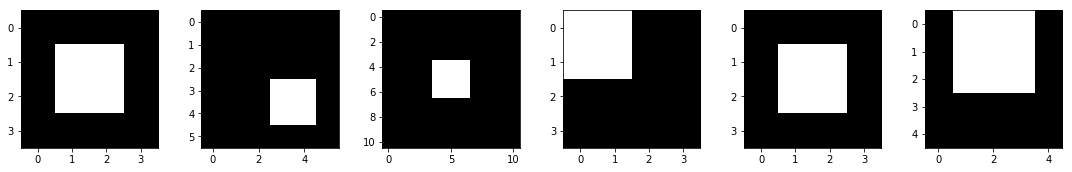

In [1379]:
#testando as funções
plt.figure(figsize=(15,15))
plt.subplot(1,6,1)
plt.imshow(gen_square(2,4),'gray')
plt.subplot(1,6,2)
plt.imshow(gen_square(2,6,1,1),'gray')
plt.subplot(1,6,3)
plt.imshow(gen_square(2,11,0,0),'gray')
plt.subplot(1,6,4)
plt.imshow(gen_square(2,4,-1,-1),'gray')
plt.subplot(1,6,5)
plt.imshow(gen_square(2,4),'gray')
plt.subplot(1,6,6)
plt.imshow(gen_square(3,5,0,-1),'gray')
plt.tight_layout()


Vamos gerar alguns quadrados e alguns círculos, e em seguida, utilizando a função **ptrans**, faremos a sua translação:

<Figure size 432x288 with 0 Axes>

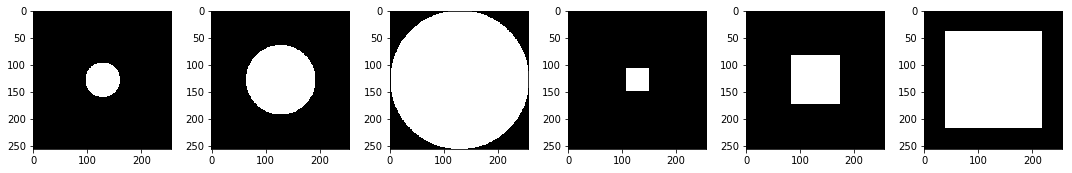

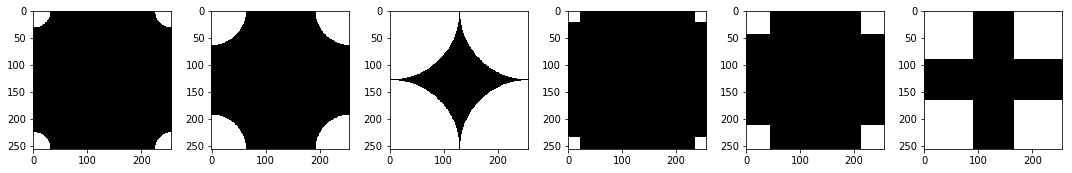

In [1380]:
#circulos
c1 = gen_circle(256,256,32,128,128)
c2 = gen_circle(256,256,64,128,128)
c3 = gen_circle(256,256,128,128,128)
#quadrados
sq1 = gen_square(45,256)
sq2 = gen_square(90,256)
sq3 = gen_square(180,256)

#circulos com tranlsação
c1t =  ia.ptrans(c1, (128,128))
c2t =  ia.ptrans(c2, (128,128))
c3t =  ia.ptrans(c3, (128,128))

#quadrados com tranlsação
sq1t = ia.ptrans(sq1, (128,128))
sq2t = ia.ptrans(sq2, (128,128))
sq3t = ia.ptrans(sq3, (128,128))


# exibição das 6 imagens geradas
plt.figure()
plt.figure(figsize = (15,15))

plt.subplot(1,6,1)
plt.imshow(c1,'gray')

plt.subplot(1,6,2)
plt.imshow(c2,'gray')

plt.subplot(1,6,3)
plt.imshow(c3,'gray')

plt.subplot(1,6,4)
plt.imshow(sq1,'gray')

plt.subplot(1,6,5)
plt.imshow(sq2,'gray')

plt.subplot(1,6,6)
plt.imshow(sq3,'gray')

plt.tight_layout()

plt.figure(figsize = (15,15))


plt.subplot(1,6,1)
plt.imshow(c1t,'gray')

plt.subplot(1,6,2)
plt.imshow(c2t,'gray')

plt.subplot(1,6,3)
plt.imshow(c3t,'gray')

plt.subplot(1,6,4)
plt.imshow(sq1t,'gray')

plt.subplot(1,6,5)
plt.imshow(sq2t,'gray')

plt.subplot(1,6,6)
plt.imshow(sq3t,'gray')

plt.tight_layout()



Foram gerados dois grupos de imagens: imagens contendo figuras no seu centro e imagens de figuras cujo centro está localizado nos quatro cantos da imagem. Essas figuras servirão como filtros passa-baixas (centralizadas) e passa-altas (transladadas), como veremos mais adiante.

In [1381]:
#carregando a imagem que será utilizada nos testes dos filtros
img = mpimg.imread('../data/cameraman.tif')

Faremos a definição de uma função para visualização do espectro em frequencia de uma imagem, calculado a partir de sua DFT. Essas funções são utilizadas para a visualização do espectro, mas não devem ser usadas nos cálculos.

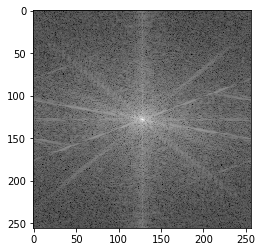

In [1382]:
def t_imspec(image):
    #retorna o espectro transladado em frequencia da imagem (em log)
    M,N = image.shape
    I = fft2(image)
    return ia.normalize(np.log(np.abs(ia.ptrans(I,(M//2,N//2))+1)),[0,255])



espec =t_imspec(img)
plt.imshow(espec,'gray')


Como o espectro em frequencia de uma imagem tem a sua origem no meio dela, aplicando um filtro circular ou quadrado no centro irá filtrar as frequencias mais baixas, pois na região fora do círculo/quadrado o espectro será multiplicado por zero. Se quiseremos filtrar as frequencias mais altas, podemos então inverter o filtro:

Passa altas = 1 - passa baixas

Agora, faremos a implementação de uma função de filtragem de uma imagem. Essa função receberá como parâmetros de entrada a imagem que se deseja filtrar e a máscara correspondente, retornanndo assim o espectro filtrado da imagem (resultado da convolução entre a imagem e a máscara).

Definiremos algumas funções que irão nos auxiliar na realização do processo de filtragem e na exibição das imagens:

In [1383]:
def f_filter(f, mask):
    #obtém a fft da imagem de entrada e faz sua multiplicação com o filtro
    F = fft2(f)
    
    G = F * mask
       
    return G

def norm_abs(f):
    #faz a normalização dos valores absolutos de uma imagem
    f = np.abs(f)
    f = ia.normalize(f, [0,255])
    
    return f

def show_spec(f):
    #realiza o deslocamento de uma imagem
    #a multiplicação do filtro pela dft da imagem precisa ser tratada para ser exibida com plt.imshow
    M,N = f.shape
    return ia.normalize(np.log(np.abs(ia.ptrans(f,(M//2,N//2))+1)),[0,255])


Sendo assim, implementaremos primeiramente um filtro passa baixas ideal, usando máscaras circulares e quadradas de tamanhos diversos.

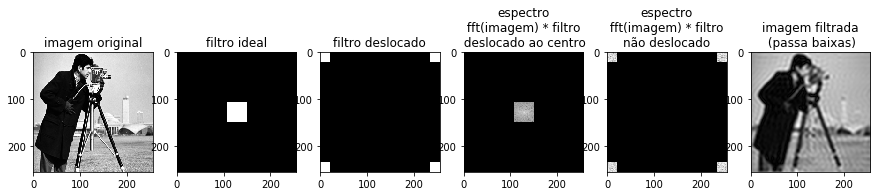

In [1384]:
f1 = img
h1 = sq1t
G1 = f_filter(f1,h1)
g1 = ifft2(G1)
filtered1 = norm_abs(g1)

espec_del = f_filter(f1,sq1t)

plt.figure(figsize=(15,15))

plt.subplot(161)
plt.title('imagem original')
plt.imshow(f1,'gray')

plt.subplot(162)
plt.title('filtro ideal')
plt.imshow(sq1,'gray')

plt.subplot(163)
plt.title('filtro deslocado')
plt.imshow(sq1t,'gray')

plt.subplot(164)
plt.title('espectro\n fft(imagem) * filtro \n deslocado ao centro')
plt.imshow(show_spec(fft2(f)*h1),'gray')

plt.subplot(165)
plt.title('espectro\n fft(imagem) * filtro \nnão deslocado')
plt.imshow(show_spec(fft2(f)*sq1),'gray')

plt.subplot(166)
plt.title('imagem filtrada\n (passa baixas)')
plt.imshow(filtered1,'gray')




É importante ressaltar que no processo de fitlragem utilizamos a função fft2 diretamente sobre a imagem, sem deslocamento para o centro. Por causa disso, também utilizamos o filtro deslocado para os cantos da imagem ao invés do filtro centrado no meio da imagem. Na  exibição do espectro da multiplicação entre a fft e a mascara, utilizamos a função  *show_spec*, que volta a colocar o centro da imagem na origem, somente para visualzação. A aplicação da ifft, contudo, é feita sobre o produto entre o a fft da imagem original **sem deslocamento** e a máscara do quadrado **no centro da imagem**

Feito isso, agora realizaremos outros experimentos, variando o tamanho dos filtros e o seu formato:

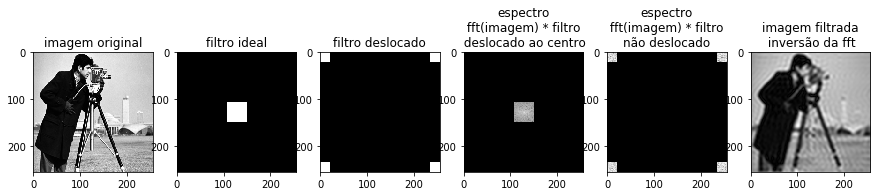

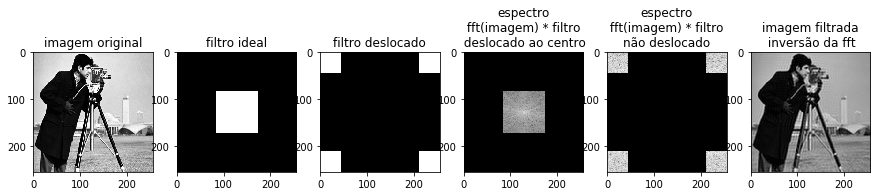

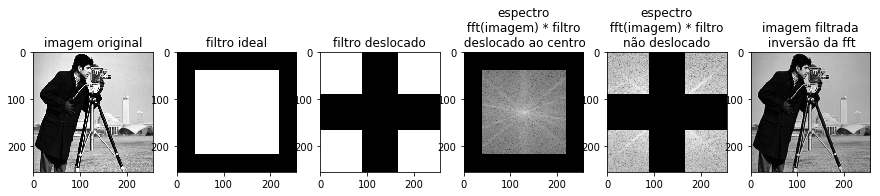

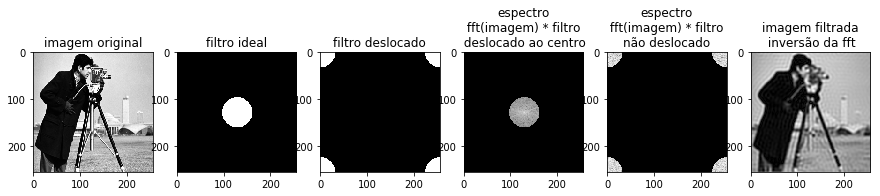

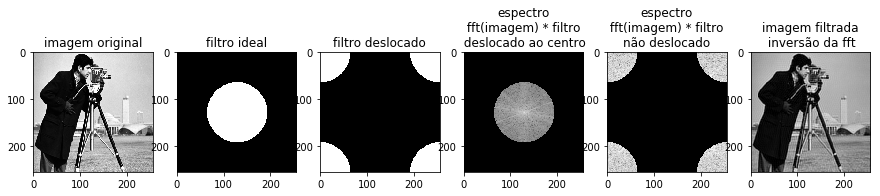

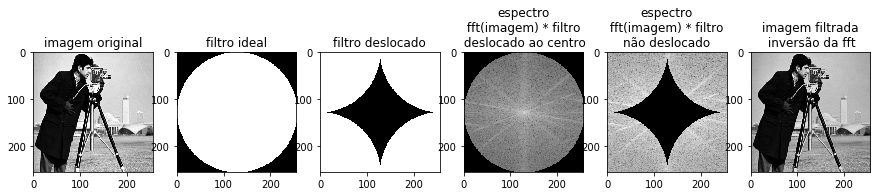

In [1385]:
def filtered(mask,f):
    
    G = f_filter(f,mask)
    g = ifft2(G)
    return norm_abs(g)

filtered2 = filtered(sq2t,f1)
filtered3 = filtered(sq3t,f1)
filtered4 = filtered(c1t,f1)
filtered5 = filtered(c2t,f1)
filtered6 = filtered(c3t,f1)


def show_filter(img,filtro,filtro_desl,im_filtrada):
    
    plt.figure(figsize=(15,15))

    plt.subplot(161)
    plt.title('imagem original')
    plt.imshow(img,'gray')

    plt.subplot(162)
    plt.title('filtro ideal')
    plt.imshow(filtro,'gray')

    plt.subplot(163)
    plt.title('filtro deslocado')
    plt.imshow(filtro_desl,'gray')

    plt.subplot(164)
    plt.title('espectro\n fft(imagem) * filtro \n deslocado ao centro')
    plt.imshow(show_spec(fft2(img)*filtro_desl),'gray')

    plt.subplot(165)
    plt.title('espectro\n fft(imagem) * filtro \nnão deslocado')
    plt.imshow(show_spec(fft2(f)*filtro),'gray')
    
    plt.subplot(166)
    plt.title('imagem filtrada\n inversão da fft')
    plt.imshow(im_filtrada,'gray')
    
    
show_filter(img,sq1,sq1t,filtered1)
show_filter(img,sq2,sq2t,filtered2)
show_filter(img,sq3,sq3t,filtered3)
show_filter(img,c1,c1t,filtered4)
show_filter(img,c2,c2t,filtered5)
show_filter(img,c3,c3t,filtered6)

Analisando as imagens acima, notamos que a medida que aumentamos o tamanho do quadrado ou do círculo, o que significa que estamos mexendo na frequencia de corte do filtro. Ao aumentar muito a frequencia de corte do filtro passa-baixas, obtemos imagens quase iguais às originais, já que cada vez menos frequencias estão sendo rejeitadas.

Em seguida, faremos uma comparação dos resultados obtidos com a utilização do filtro circular o filtro quadrado:

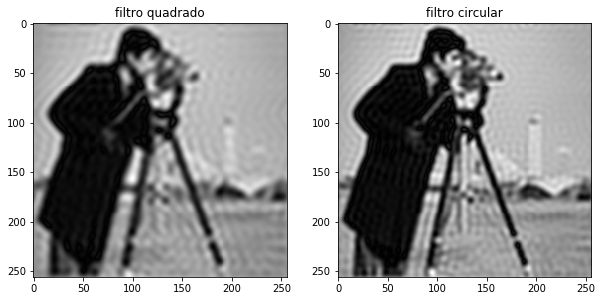

In [1386]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('filtro quadrado')
plt.imshow(filtered1,'gray')

plt.subplot(1,2,2)
plt.title('filtro circular')
plt.imshow(filtered4,'gray')

Agora, vamos implementar um filtro passa altas. Fazendo um raciocínio análogo, se o filtro passa baixas era representado por um círculo ou quadrado localizado no centro da figura para que as frequencias altas do espectro de fourier fossem rejeitadas, no filtro passa alta devemos fazer com que as frequencias não sejam mais rejeitadas. Dessa forma, basta inverter o esquema de cores da máscara, invertendo assim o filtro:

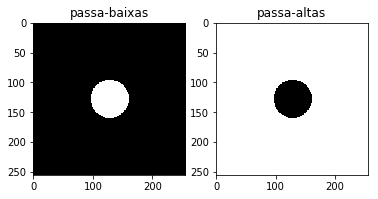

In [1387]:
def high_pass(mask):
    #cria uma máscara de filtro passa-altas a partir de uma máscara de filtro passa-baixas
    mask = ia.normalize(mask,[0,255])
    x = 255 - mask
    
    return x
 
hp1 = high_pass(c1)


plt.subplot(121)
plt.title('passa-baixas')
plt.imshow(c1,'gray')
plt.subplot(122)
plt.title('passa-altas')
plt.imshow(hp1,'gray')

Assim, vamos repetir o procedimento feito acima, mas utilizando desta vez máscaras de filtros passa-altas:

In [1388]:
hp1 = high_pass(sq1)
hp2 = high_pass(sq2)
hp3 = high_pass(sq3)
hp4 = high_pass(c1)
hp5 = high_pass(c2)
hp6 = high_pass(c3)

#quadrados com tranlsação
hp_sq1t = ia.ptrans(hp1, (128,128))
hp_sq2t = ia.ptrans(hp2, (128,128))
hp_sq3t = ia.ptrans(hp3, (128,128))


#circulos com tranlsação
hp_c1t =  ia.ptrans(hp4, (128,128))
hp_c2t =  ia.ptrans(hp5, (128,128))
hp_c3t =  ia.ptrans(hp6, (128,128))



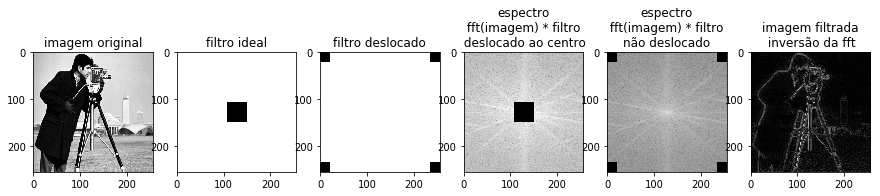

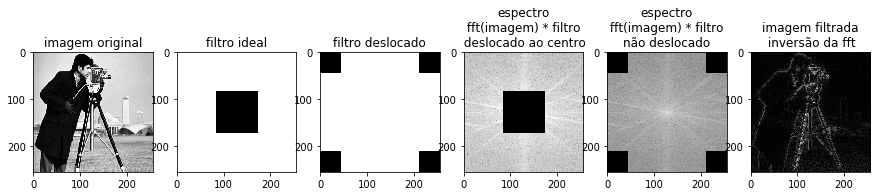

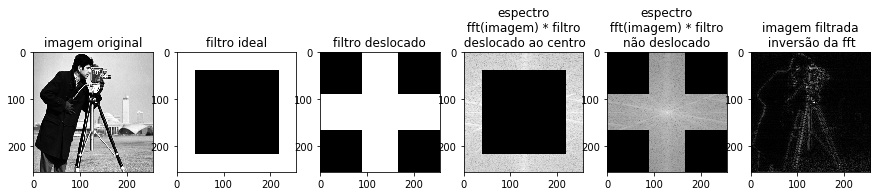

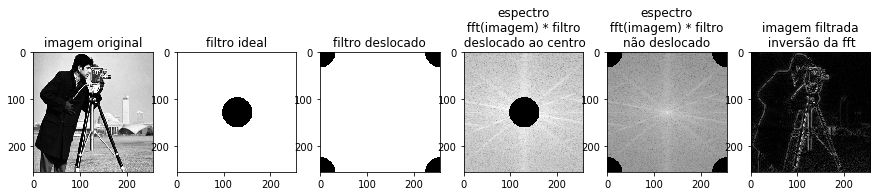

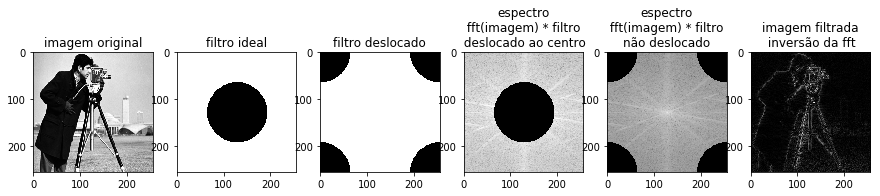

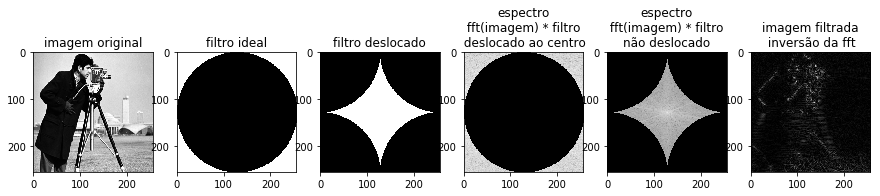

In [1389]:
filtered_hp1 = filtered(hp_sq1t,f1)
filtered_hp2 = filtered(hp_sq2t,f1)
filtered_hp3 = filtered(hp_sq3t,f1)
filtered_hp4 = filtered(hp_c1t,f1)
filtered_hp5 = filtered(hp_c2t,f1)
filtered_hp6 = filtered(hp_c3t,f1)


show_filter(img,hp1,hp_sq1t,filtered_hp1)
show_filter(img,hp2,hp_sq2t,filtered_hp2)
show_filter(img,hp3,hp_sq3t,filtered_hp3)
show_filter(img,hp4,hp_c1t,filtered_hp4)
show_filter(img,hp5,hp_c2t,filtered_hp5)
show_filter(img,hp6,hp_c3t,filtered_hp6)

Anaslisndo os resultados obtidos, notamos que o comportamento do filtro foi de fato o de um passa altas, eliminando as baixas frequencias e realçando as bordas.

### b. Filtro Butterworth

Crie uma função para projetar um filtro passa-baixas Butterworth. A função de transferência do filtro passa-baixas de Butterworth de ordem $n$ e com posição da frequência de corte a uma distância $D_0$ da origem é definida pela relação $$ H(u,v) = \frac{1}{1 + [\frac{D(u,v)}{D_0}]^{2n}}, $$ onde $n$ é a ordem do filtro. Para facilitar a implementação, podemos usar a seguinte expressão: $$ H(u,v) = \frac{1}{1 + (\sqrt{2} - 1)(\sqrt{(\frac{u}{N})^2 + (\frac{v}{M})^2)}.t_c)^{2n}}$$ com $$ u \in{[-\frac{N}{2},N - \frac{N}{2} -1]}$$ $$ v \in{[-\frac{M}{2},M - \frac{M}{2} -1]}$$ $$ t_c \in{[2, max\{N,M\}]}$$

Compare o resultado da filtragem de uma imagem usando um filtro ideal e o filtro de Butterworth.

## Resolução (item b)

A partir da fórmula dada, implementar uma função para a obtenção da máscara do filtro passa-baixas butterworth e compará-lo com a máscara de um filtro ideal. 



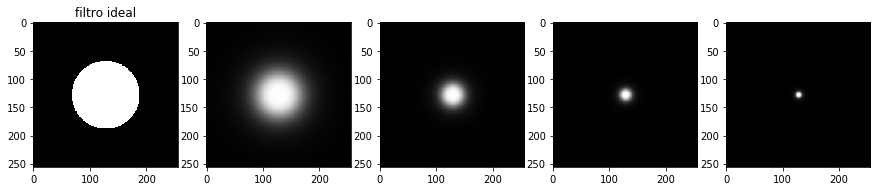

In [1390]:
c = gen_circle(256,256,60,128,128)
f2 = gen_circle(512,512,192,256,256)

def BW_filter(M,N,n,tc):
    #filtro butterworth passa baixas
    
    #colocar a origem no centro
    u = np.arange(M)-(M//2)
    v = np.arange(N)-(N//2)

    #print(u,'\n')
    #print(v)
    
    u,v = np.meshgrid(u,v)
    u = np.array(u)
    v = np.array(v)
        
    bw_filter  =  1/(1+(np.sqrt(2)-1)*(np.sqrt(((u/N)**2) + (v/M)**2)*tc)**(2*n))

    return ia.normalize(bw_filter,[0,255])


bw1 = BW_filter(256,256,2,8)
bw2 = BW_filter(256,256,2,16)
bw3 = BW_filter(256,256,2,32)
bw4 = BW_filter(256,256,2,64)

plt.figure(figsize=(15,15))

plt.subplot(151)
plt.title('filtro ideal')
plt.imshow(c,'gray')
plt.subplot(152)
plt.imshow(bw1,'gray')
plt.subplot(153)
plt.imshow(bw2,'gray')
plt.subplot(154)
plt.imshow(bw3,'gray')
plt.subplot(155)
plt.imshow(bw4,'gray')

Como observado nas figuras acima, mantendo-se a ordem do filtro igual e variando os valores do parâmetro **tc**, nota-se que o aumento de tc implica na redução do tamanho do filtro. Agora, façamos outro experimento, variando dessa vez a ordem do filtro:

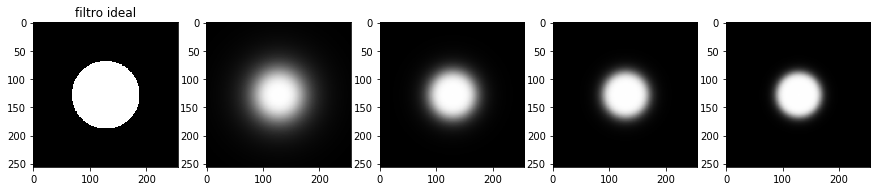

In [1391]:
bw5 = BW_filter(256,256,2,7)
bw6 = BW_filter(256,256,3,7)
bw7 = BW_filter(256,256,4,7)
bw8 = BW_filter(256,256,5,7)

plt.figure(figsize=(15,15))

plt.subplot(151)
plt.title('filtro ideal')
plt.imshow(c,'gray')
plt.subplot(152)
plt.imshow(bw5,'gray')
plt.subplot(153)
plt.imshow(bw6,'gray')
plt.subplot(154)
plt.imshow(bw7,'gray')
plt.subplot(155)
plt.imshow(bw8,'gray')

Analisando as imagens acima, nota-se que ao aumentar a ordem do filtro, mais ele fica próximo do filtro ideal, aumentando a borda de corte entre as frequencias maiores e menores que a frequencia de corte.

<br>
Por fim, faremos a filtragem de uma imagem utilizando um filtro passa baixas ideal e um filtro de butterworth para comparar os resultados:

<Figure size 1080x1080 with 0 Axes>

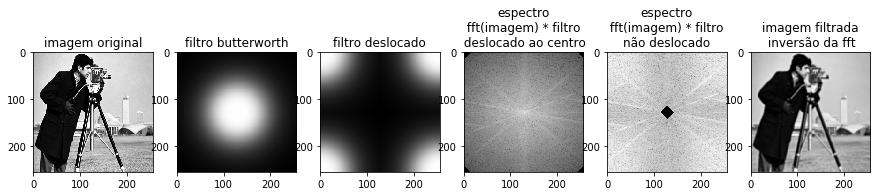

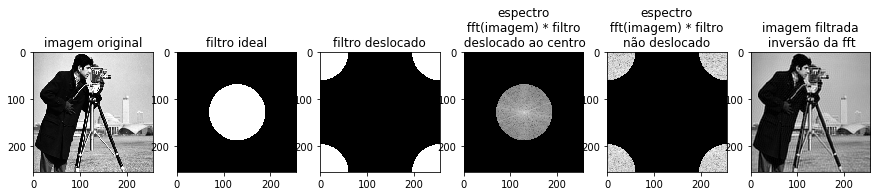

In [1392]:
c = gen_circle(256,256,60,128,128)
ct = ia.ptrans(c,(128,128))

bwf = BW_filter(256,256,2,5)
bwft = ia.ptrans(bwf,(128,128))

filtered_c = filtered(ct,f1)
filtered_bw = filtered(bwt,f1)
plt.figure(figsize=(15,15))


plt.figure(figsize=(15,15))

plt.subplot(161)
plt.title('imagem original')
plt.imshow(img,'gray')

plt.subplot(162)
plt.title('filtro butterworth')
plt.imshow(bwf,'gray')
 
plt.subplot(163)
plt.title('filtro deslocado')
plt.imshow(bwft,'gray')

plt.subplot(164)
plt.title('espectro\n fft(imagem) * filtro \n deslocado ao centro')
plt.imshow(show_spec(fft2(f1)*bwft),'gray')

plt.subplot(165)
plt.title('espectro\n fft(imagem) * filtro \nnão deslocado')
plt.imshow(show_spec(fft2(f1)*bwf),'gray')
    
plt.subplot(166)
plt.title('imagem filtrada\n inversão da fft')
plt.imshow(filtered_bw,'gray')

show_filter(f1,c,ct,filtered_c)

Para a realização da comparação do filtro butterworth com o filtro real, procuramos escolher um tamanho do círculo para o filtro ideal que tivesse quase o mesmo tamanho do butterworth. Assim, seria um pouco mais coerente a comparação entre os resultados. Agora, colocaremos as imagens lado a lado para ver melhor os detalhes da filtragem de cada máscara:

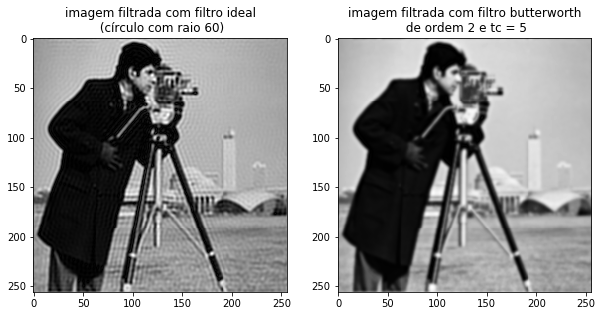

In [1393]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('imagem filtrada com filtro ideal\n (círculo com raio 60)')
plt.imshow(filtered_c,'gray')

plt.subplot(122)
plt.title('imagem filtrada com filtro butterworth\n de ordem 2 e tc = 5')
plt.imshow(filtered_bw,'gray')

Comparando as duas imagens, notamos que o filtro butterworth consegue suavizar a imagem de uma forma melhor, sem causar efeitos de oscilação (*ringing artifacts*) nas regiões próximas das bordas/contornos. Já no filtro ideal, como a transição entre as frequencias altas e baixas é mais abrupta, esse efeito é bem mais perceptível.

### c.  Filtrando uma imagem com textura

Veja que a imagem do código de barras a seguir possui uma textura no fundo. Projete um filtro (em frequencia) que elimine esta textura, sem borrar demais a imagem.

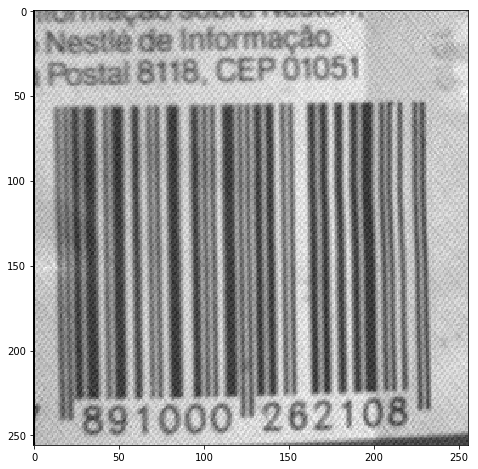

In [1394]:
bc = mpimg.imread('../data/barcode.tif')
plt.figure(figsize=(8,8))
plt.imshow(bc,cmap='gray');
plt.show()

O primeiro passo para o projeto do filtro é analisar o espectro de fourier da imagem dada, para que seja possível observar a distribuição das suas frequências:

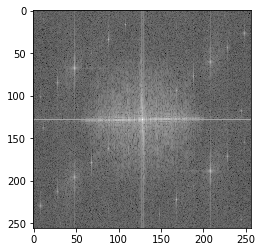

In [1395]:
barspec = t_imspec(bc)

plt.imshow(barspec,'gray')

Observando a imagem do espectro obtida, notamos que há uma grande contribuição de baixas frequencias, e pequenas distribuições de frequencias um pouco mais altas, de maneira um pouco alternada (direção das diagonais do espectro). Vamos experimentar a utilização do filtro butterworth para a eliminação da textura, variando a sua ordem e o valor do parâmetro *tc*

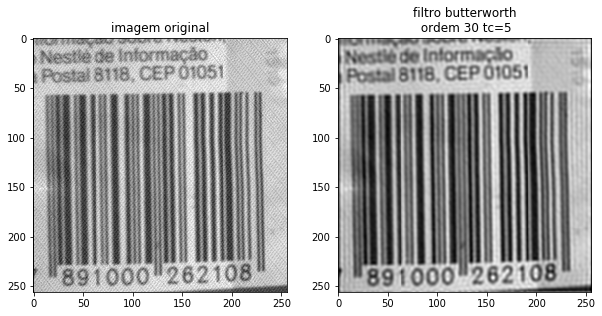

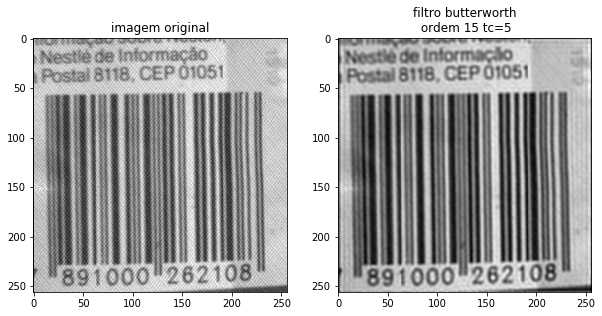

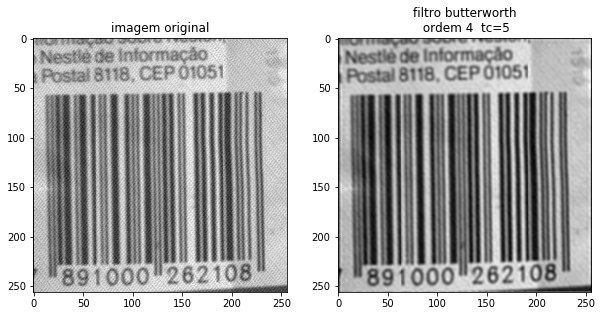

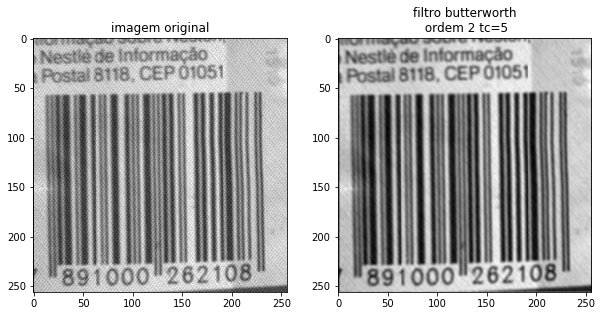

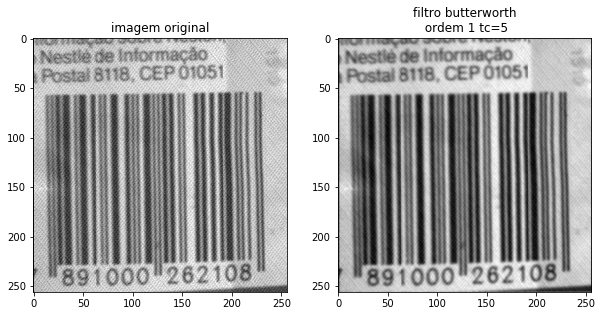

In [1396]:
#experimentos variando a ordem do filtro:

butter1 = BW_filter(256,256,30,5)
butter2 = BW_filter(256,256,15,5)
butter3 = BW_filter(256,256,4,5)
butter4 = BW_filter(256,256,2,5)
butter5 = BW_filter(256,256,1,5)

filtered_bd = filtered(bt_diff,bc)

filtered_bd2 = filtered(hp1,bc) 

def show_butter(img,bwf):
    #retorna a a imagem filtrada com o filtro especificado
    t = ia.ptrans(bwf,(128,128))
    tf = filtered(t,img)
    
    return tf

b1 = show_butter(bc,butter1)
b2 = show_butter(bc,butter2)
b3 = show_butter(bc,butter3)
b4 = show_butter(bc,butter4)
b5 = show_butter(bc,butter5)


plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('imagem original')
plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 30 tc=5')
plt.imshow(b1,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 15 tc=5')
plt.imshow(b2,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4  tc=5')
plt.imshow(b3,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 2 tc=5')
plt.imshow(b4,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 1 tc=5')
plt.imshow(b5,'gray')



Analisando as imagens obtidas acima, escolheremos a ordem 4 para o filtro, por conseguir suavizar bem o efeito de textura, mas sem borrar muito a imagem. Agora faremos o ajuste do parâmetro tc:

In [1397]:
#experimentos variando a o parâmetro tc:

butter1 = BW_filter(256,256,4,7)
butter2 = BW_filter(256,256,4,5)
butter3 = BW_filter(256,256,4,4)
butter4 = BW_filter(256,256,4,3)
butter5 = BW_filter(256,256,4,2)

filtered_bd = filtered(bt_diff,bc)

filtered_bd2 = filtered(hp1,bc) 

def show_butter(img,bwf):
    #retorna a a imagem filtrada com o filtro especificado
    t = ia.ptrans(bwf,(128,128))
    tf = filtered(t,img)
    
    return tf

b1 = show_butter(bc,butter1)
b2 = show_butter(bc,butter2)
b3 = show_butter(bc,butter3)
b4 = show_butter(bc,butter4)
b5 = show_butter(bc,butter5)



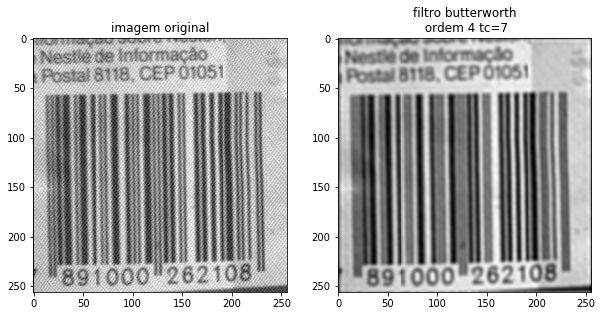

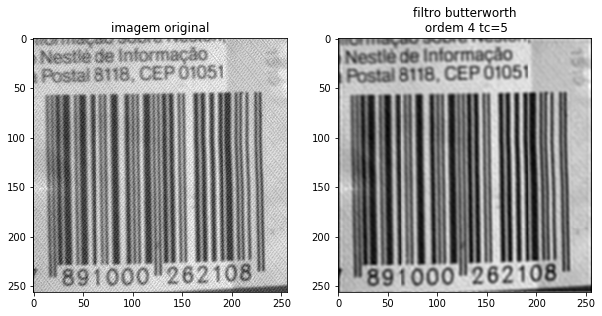

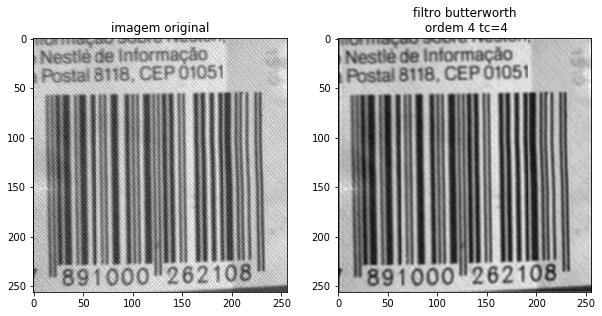

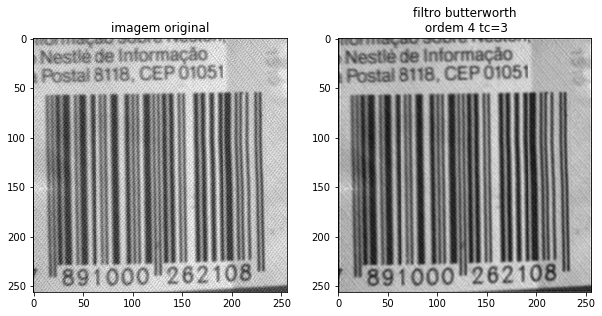

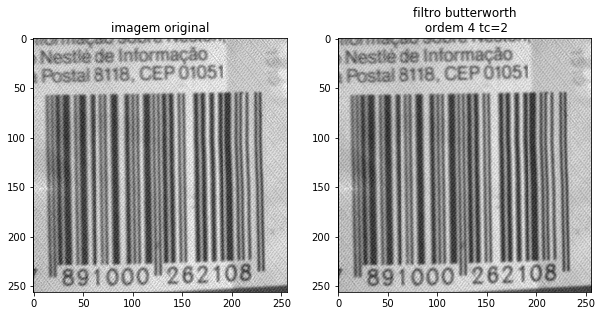

In [1398]:

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('imagem original')
plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4 tc=7')
plt.imshow(b1,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4 tc=5')
plt.imshow(b2,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4 tc=4')
plt.imshow(b3,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4 tc=3')
plt.imshow(b4,'gray')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')

plt.imshow(bc,'gray')

plt.subplot(122)
plt.title('filtro butterworth\n ordem 4 tc=2')
plt.imshow(b5,'gray')



Assim, entre os experimentos feitos, o uso de um filtro butterworth de ordem 4 e com tc=5 parece ser capaz de suavizar o efeito da textura mas sem borrar a imagem. Vamos verificar o espectro de fourier da imagem filtrada:

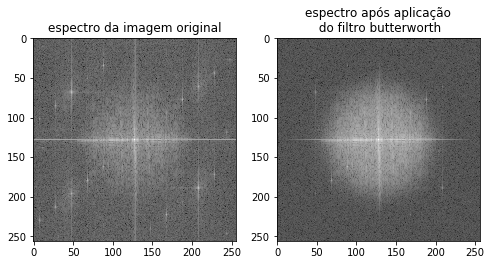

In [1399]:
#butterworth de ordem 4, tc=5
i = show_butter(bc,butter2)
imf = t_imspec(i)

plt.figure(figsize=(8,8))
plt.subplot(121)
plt.title('espectro da imagem original')
plt.imshow(barspec,'gray')
plt.subplot(122)
plt.title('espectro após aplicação\n do filtro butterworth')
plt.imshow(imf,'gray')

Observando os espectros, notamos que as frequencias mais altas foram atenuadas, principalmente nas direções diagonais da figura do espectro, e houve também um realce de frequencias mais baixas. Assim, a aplicação do filtro butterworth produziu um resultado desejável.

## Parte 2 - Identificando Translação/Rotação por Correlação de Fase

Dos itens abaixo *a*, *b* e *c* você deve fazer obrigatoriamente o item *a* e no mínimo mais um item: *b* ou *c*. Nada impede você de fazer os 3 itens: *a*, *b* e *c*.

Através da Correlação de fase é possível identificar uma translação ou uma rotação sofrida por uma imagem (veja o notebook [Correlação de Fase](13 Correlacao de fase.ipynb)). 

### a. Coordenada polar da imagem ou da DFT?

Para identificar a rotação, a imagem é transformada para coordenadas polares, para depois ser aplicada a Transformada de Fourier e então calculada a correlação de fase. Verifique se é equivalente fazer a transformada de Fourier e só depois fazer a conversão para coordenadas polares no domínio da frequência para então computar a correlação de fase;


# Resolução - Exercício 2

Ao trabalharmos com a rotação e translação de imagens, para que se evite perda de informação durante o processo, devemos inserir bordas nas imagens para que o seu tamanho aumente, evitando assim que a imagem seja 'cortada' após a rotação/translação:

Neste exercício, também trabalharemos com a imagem **cameraman.tif** :

In [1400]:
f = mpimg.imread('../data/cameraman.tif')

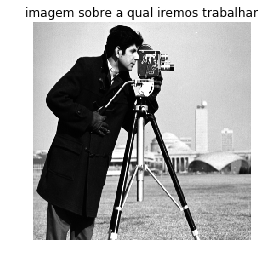

In [1401]:
plt.title('imagem sobre a qual iremos trabalhar')
plt.axis('off')
plt.imshow(f,'gray')
img = f

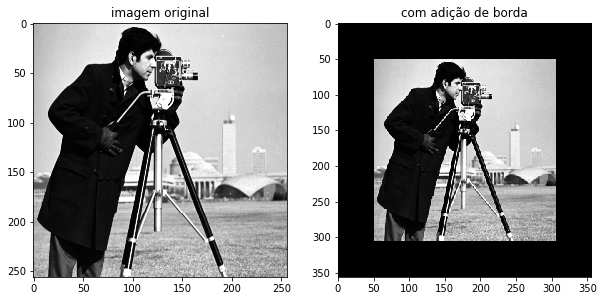

In [1402]:
def addzeros(f,wid):
    #f: imagem original
    #wid: largura da borda
    
    w0,h0 = f.shape
    imgshape = (w0+(2*wid),h0+(2*wid))
    w1,h1 = imgshape
    
    z = np.zeros(imgshape)
    
    z[wid:wid+h0,wid:wid+w0] = f
    #print(z)
    return z

img_zer = addzeros(img,50)
#print(zer.shape)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')
plt.imshow(img,'gray')
plt.subplot(122)
plt.title('com adição de borda')
plt.imshow(img_zer,'gray')

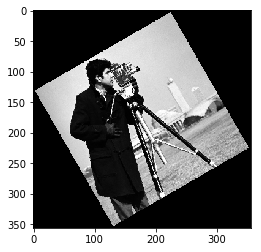

In [1403]:
def rotate_img(f,angle):
    
    # Rotacionando a imagem
    t1 = np.array([
             [1,0,-f.shape[0]/2.],
             [0,1,-f.shape[1]/2.],
             [0,0,1]]);

    t2 = np.array([
             [1,0,f.shape[0]/2.],
             [0,1,f.shape[1]/2.],
             [0,0,1]]);
    
    angle = np.radians(angle)
    r1 = np.array([
        [np.cos(angle),-np.sin(angle),0],
        [np.sin(angle),np.cos(angle),0],
        [0,0,1]]);
    
    T = t2.dot(r1).dot(t1)
    f_rot = ia.affine(f,T,0)
    
    return f_rot
img_rot = rotate_img(img_zer,30)

plt.imshow(img_rot,'gray')

Em seguida, exibiremos a imagem após o uso da função **ia.polar** :

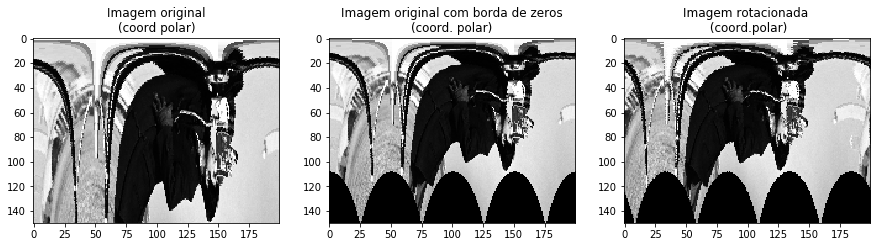

In [1404]:
W,H = img.shape
f_polar = ia.polar(f,(150,200),2*np.pi)
f_rot_polar = ia.polar(img_rot,(150,200),2*np.pi)
f_z_polar = ia.polar(img_zer,(150,200),2*np.pi)
plt.figure(1,figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(f_polar, cmap='gray')
plt.title('Imagem original\n(coord polar)')
#plt.title('Imagem original (coord. polar)')

plt.subplot(1,3,2)
plt.imshow(f_z_polar, cmap='gray')
plt.title('Imagem original com borda de zeros\n(coord. polar)')

plt.subplot(1,3,3)
plt.title("Imagem rotacionada \n (coord.polar)")
plt.imshow(f_rot_polar,'gray')

Aqui, definiremos uma função para o cálculo do ponto de máxima correlação de uma imagem:

In [1405]:
def max_corr(f1,f2):
    #calcula o ponto de máxima correlação entre duas imagens
    #f1,f2 = imagens de entrada
    # f1 será a imagem normal, e f2 a imagem rotacionada
    
    f_polar     = ia.polar(f1,f1.shape,2*np.pi)
    f_rot_polar = ia.polar(f2,f2.shape,2*np.pi) 
    
    # Calculando a correlação de fase
    g = ia.phasecorr(f_polar,f_rot_polar)

    # Encontrando o ponto de máxima correlação 
    i = np.argmax(g)
    corr = np.unravel_index(i,g.shape)

    # Calculate the angle
    ang = (float(corr[1])/g.shape[1])*360
    print('Ponto de máxima correlação: ',ang)
    
    return ang

max_corr(img_zer,img_rot)

Ponto de máxima correlação:  30.337078651685392


30.337078651685392

Vamos obter o espectro de fourier da imagem original e da imagem em rotacionada:

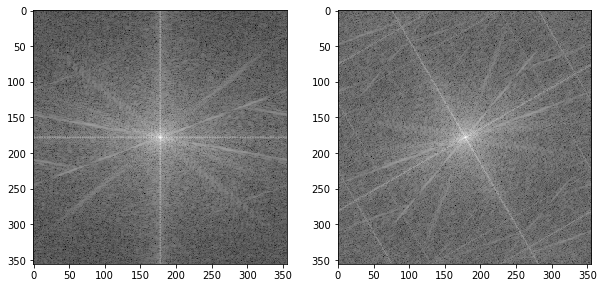

In [1406]:
img_espec = t_imspec(img_zer)
rot_espec = t_imspec(img_rot)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_espec,'gray')
plt.subplot(122)
plt.imshow(rot_espec,'gray')

Após o estabelecimento de todas essas funções, podemos dar início à comparação solicitada.
Faremos dois experimentos nesta etapa, alterando a ordem das operações.

### Primeiro experimento:
##### Coordenadas Polares , Transformada de Fourier e Correlação de Fase

Vamos retomar as imagens em coordenadas polares obtidas acima:

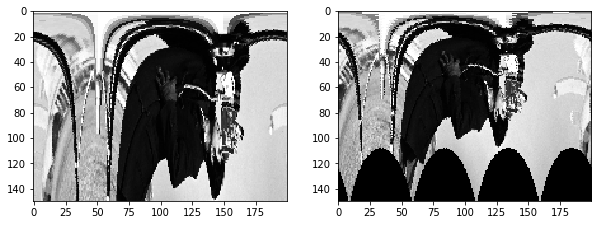

In [1407]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(f_polar,'gray')
plt.subplot(122)
plt.imshow(f_rot_polar,'gray')
           

Agora, vamos aplicar a transformada de fourier nas imagens:

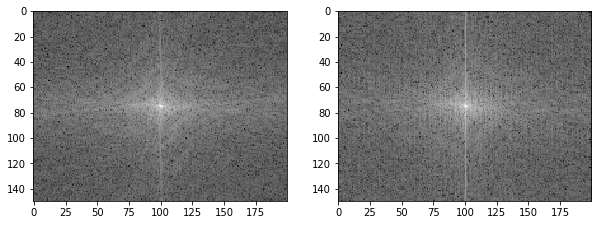

In [1408]:
fft_polar     = fft2(f_polar)
fft_polar_rot = fft2(f_rot_polar) 

#para exibição do espectro, vamos retomar as funções t_imspec
#lembrando que essas funções centralizam a fft e fazm uma normalização para exibição

espec_polar     = t_imspec(f_polar)
espec_polar_rot = t_imspec(f_rot_polar)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(espec_polar,'gray')

plt.subplot(122)
plt.imshow(espec_polar_rot,'gray')


Por fim, calcularemos a correlação de fase entre as imagens:

In [1409]:
# Calculando a correlação de fase
g = ia.phasecorr(f_polar,f_rot_polar)

# Encontrando o ponto de máxima correlação 
i = np.argmax(g)
corr = np.unravel_index(i,g.shape)

# Calculate the angle
ang = (float(corr[1])/g.shape[1])*360
print('Ponto de máxima correlação: ',ang)

Ponto de máxima correlação:  30.6


### Segundo experimento:
#####  Transformada de Fourier, Coordenadas Polares e Correlação de Fase

/home/marcio/progs/ia898/src/interpollin.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  f = f.astype(float)


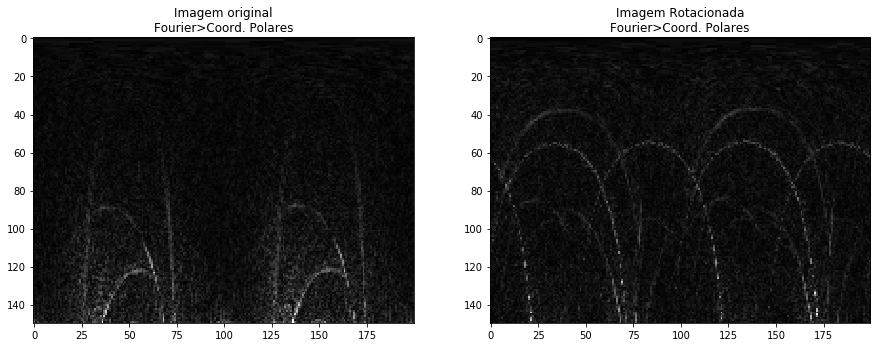

In [1410]:
fft_2     = fftn(img_zer)
fft_rot_2 = fftn(img_rot)

f_polar_2     = ia.polar(fft_2,(150,200),2*np.pi)
f_rot_polar_2 = ia.polar(fft_rot_2,(150,200),2*np.pi)

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.title('Imagem original\nFourier>Coord. Polares')
plt.imshow(abs(f_polar_2).astype('int'),'gray')
plt.subplot(122)
plt.title('Imagem Rotacionada\nFourier>Coord. Polares')
plt.imshow(abs(f_rot_polar_2).astype('int'),'gray')

Por fim, calcularemos a correlação de fase entre as imagens:

In [1411]:
# Calculando a correlação de fase
#Aqui utilizaremos a expressão exibida no enunciado para calcular a correlação de fase:

prod = f_polar_2 * np.conjugate(f_rot_polar_2)
quo = prod/np.abs(prod)

g = ifft2(quo)
g = g.real


# Encontrando o ponto de máxima correlação 
i = np.argmax(g)
corr = np.unravel_index(i,g.shape)

# Cálculo do Angulo
ang = (float(corr[1])/g.shape[1])*360
print('Ponto de máxima correlação: ',ang)

Ponto de máxima correlação:  0.0


obs: no cálculo da correlação desta segunda parte, não utilizamos a função ia.phasecorr para comparar os resultados da implementação, mas o resultado obtido foi diferente:
(não consegui achar uma explicação para isso:)

In [1412]:
#obs: no cálculo da correlação desta segunda parte, não utilizamos a função ia.phasecorr
#caso tivéssemos utilizado, o resultado seria diferente (não consegui achar uma explicação para isso:)
gn =ia.phasecorr(f_polar_2,f_rot_polar_2)

# Encontrando o ponto de máxima correlação 
i = np.argmax(gn)
corr = np.unravel_index(i,gn.shape)

# Cálculo do Angulo
ang = (float(corr[1])/gn.shape[1])*360
print('Ponto de máxima correlação: ',ang)

Ponto de máxima correlação:  264.6


Analisando as imagens obtidas no espectro para os dois procedimentos e os pontos de correlação encontrados, chegamos à conclusão de que a utilização do segundo método (calcular a transformada de fourier antes) não produz bons resultados. O uso das coordenadas polares serve para tornar a análise do espectro de fourier mais simples, então faz sentido a mudança de coordenadas após a obtenção do espectro.


### b. Rotação e translação simultaneas

Imagine agora que uma imagem tenha sofrido rotação e translação simultaneamente. Tente agora identificar ambas transformações com esta mesma técnica. (DICA: Tente resolver o problema em 2 etapas, ou seja, aplicando 2 vezes os passos para a correlação de fase);
    c. (Opcional) Identifique o quão robusta é esta técnica, com relação a: ruído, variação de contraste, escala

primeiramente, vamos retomar a imagem utilizada no item a) que teve a adição de alguns zeros. Em seguida, faremos a sua translação:

In [1413]:
zer_img = addzeros(img,100)

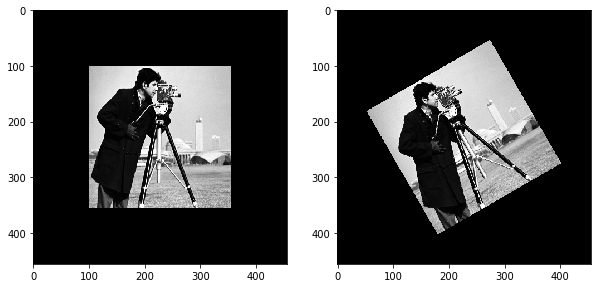

In [1414]:
rot_img = rotate_img(zer_img,30)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(zer_img,'gray')
plt.subplot(122)

plt.imshow(rot_img,'gray')

Vamos fazer a translação da imagem:

(456, 456)


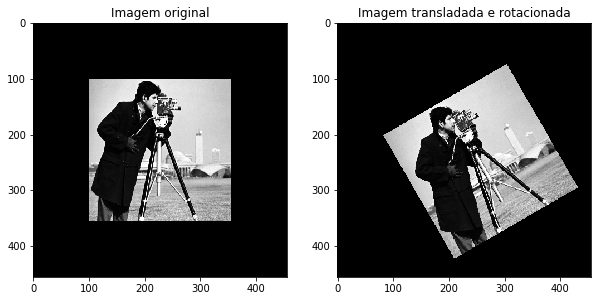

In [1415]:
# Transladando a imagem para (x,y)
x = 20
y = 30

#f_trans = ia.ptrans(rot_img,(20,30))
f_trans = np.zeros(rot_img.shape)
f_trans[x:,y:] = rot_img[:-x,:-y]

plt.figure(1,(10,10))
plt.subplot(1,2,1)
plt.imshow(zer_img, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,2,2)
plt.imshow(f_trans, cmap='gray')
plt.title('Imagem transladada e rotacionada')

print(f_trans.shape)

Depois de efetuar a rotação e a translação da imagem, calcularemos a correlação de fase:

In [1416]:
#Calculo da correlação de fase:

g = ia.phasecorr(zer_img,rot_img)

# Encontrando o ponto de máxima correlação
i = np.argmax(g)
row,col = np.unravel_index(i,g.shape)

v = np.array(img.shape) - np.array((row,col))
print('Ponto de máxima correlação: ',v)
#print(zer_img.shape)



Ponto de máxima correlação:  [-155  242]


Notamos que o ponto foi achado corretamente (basta olhar a figura e ver o deslocamento)

Text(0.5,1,'Imagem transladada (polar)')

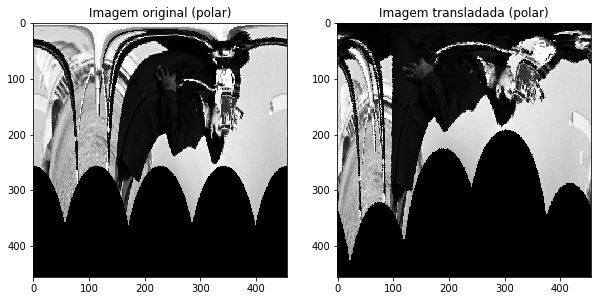

In [1417]:
W,H = zer_img.shape
zerimg_p = ia.polar(zer_img,zer_img.shape,2*np.pi)
f_trans_p = ia.polar(f_trans,f_trans.shape,2*np.pi)

plt.figure(1,(10,10))
plt.subplot(1,2,1)
plt.imshow(zerimg_p, cmap='gray')
plt.title('Imagem original (polar)')

plt.subplot(1,2,2)
plt.imshow(f_trans_p, cmap='gray')
plt.title('Imagem transladada (polar)')

Por fim, vamos calcular a correlação de fase para obter o ângulo da rotação:

In [1418]:
# Calculando a correlação de fase
g = ia.phasecorr(zerimg_p,f_rot_p)

# Encontrando o ponto de máxima correlação 
i = np.argmax(g)
corr = np.unravel_index(i,g.shape)

# Calculate the angle
ang = (float(corr[1])/g.shape[1])*360
print('Ponto de máxima correlação: ',ang)

Ponto de máxima correlação:  30.0


Aqui, observamos que o angulo de rotação apresentou um valor idêntico ao valor colocado na função de entrada no início do exercício.

### c. *Template Matching* 

Experimente resolver um problema de *Template Matching* usando correlação fase. Ou seja, recorte um pedaço de uma imagem e tente encontrar este pedaço na imagem original maior.

Nesta etapa, utilizaremos a imagem presente no banco de imagens da disciplina, **keyb.pgm** :

(316, 295)


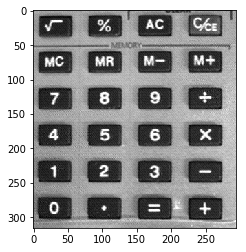

In [1419]:
img2 = mpimg.imread('../data/keyb.tif')

plt.imshow(img2,'gray')
print(img2.shape)

Em seguida, vamos definir a função **recorte**, que retira um pedaço da imagem original, que será usado no processo do template matching:

(54, 54)


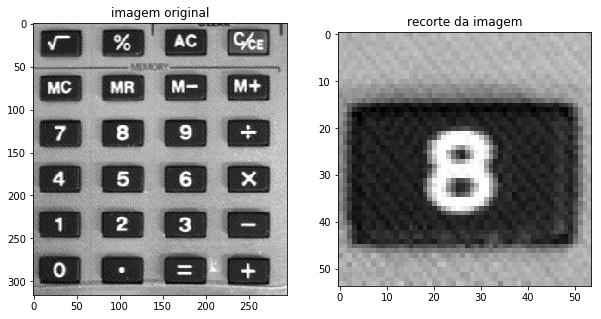

In [1420]:
def recorte(img,size,center):
    #img: imagem de entrada
    #size: tamanho do recorte (quadrado)
    #center: ponto central do quadrado onde será feito o recorte (tupla)
    xc,yc = center 
    square = np.zeros((size,size))
    #print(square.shape)
    
    square = img[xc-(size//2):xc+(size//2),yc-(size//2):yc+(size//2)]
    #print(square.shape)
    return square
rec =recorte(img2,55,(125,105))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('imagem original')
plt.imshow(img2,'gray')
plt.subplot(122)
plt.title('recorte da imagem')
plt.imshow(rec,'gray')
    
    
print(rec.shape)

In [1421]:
print(img2.shape)

(316, 295)


Por fim, definimos a função **t_matching**, que vai realizar todo o processo:

coordenadas para translação do template: ( 98 , 78 )


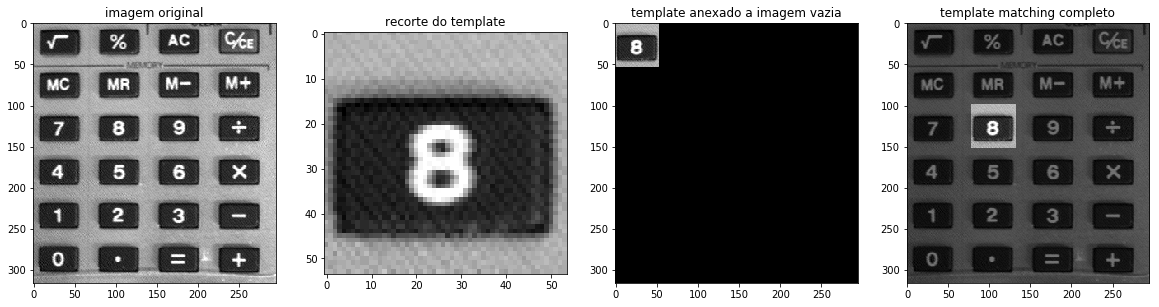

In [1422]:
def t_matching(image,temp):
    
    #print(temp.shape)
    
    #extração das dimensões do template
    x,y = temp.shape
    
    #montagem de uma matriz de zeros (para abrigar o template)
    h = np.zeros_like(image)
    
    #colocamos o template na matriz de zeros
    h[:x,:y] = temp
    
    #calculo do ponto de correlação máxima
    pc = ia.phasecorr(image,h)
    i = np.argmax(pc)
    row,col = np.unravel_index(i, pc.shape)
    print("coordenadas para translação do template: (",row,",",col,")")

    template = ia.ptrans(h,(row,col))
 
    matched_template = 0.5*template +0.4*image
    
    plt.figure(figsize=(20,20))
    plt.subplot(141)
    plt.title('imagem original')
    plt.imshow(image,'gray')
    
    plt.subplot(142)
    plt.title('recorte do template')
    plt.imshow(temp,'gray')
    
    plt.subplot(143)
    plt.title('template anexado a imagem vazia')
    plt.imshow(h,'gray')
    
    plt.subplot(144)
    plt.title('template matching completo')
    plt.imshow(matched_template,'gray')

t_matching(img2,rec)

O resultado obtido foi bem satisfatório, considerando que a imagem  usada possui vários pedaços (teclas) semelhantes, e a correlação nos permitiu determinar a posição exata da localização da tecla que foi recortada da imagem.